In [3]:
import matlab.engine, numpy as np

eng = matlab.engine.start_matlab()
eng.cd(r"D:\AAI\ACSS\example_1", nargout=0)

out = eng.run_model(
    "model/topology_1.slx",
    "BuildDir", "build",
    "CleanAfterRun", True,
    "StopTime", "0.5",
    "Debug", True,
    nargout=1
)

if not out["ok"]:
    print(out["report"])
    raise RuntimeError("Sim failed")

t = np.array(out["t"]).squeeze() if len(out["t"]) else None
Vout = np.array(out["Vout"]).squeeze() if len(out["Vout"]) else None
print("t:", None if t is None else t.shape)
print("Vout:", None if Vout is None else Vout.shape)


t: (50001,)
Vout: (50001,)


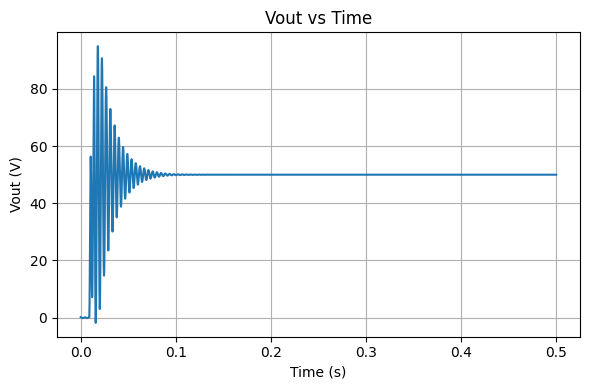

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Extract
t = np.array(out["t"]).squeeze()
Vout = np.array(out["Vout"]).squeeze()

# Plot
plt.figure(figsize=(6,4))
plt.plot(t, Vout)
plt.xlabel("Time (s)")
plt.ylabel("Vout (V)")
plt.title("Vout vs Time")
plt.grid(True)
plt.tight_layout()
plt.show()


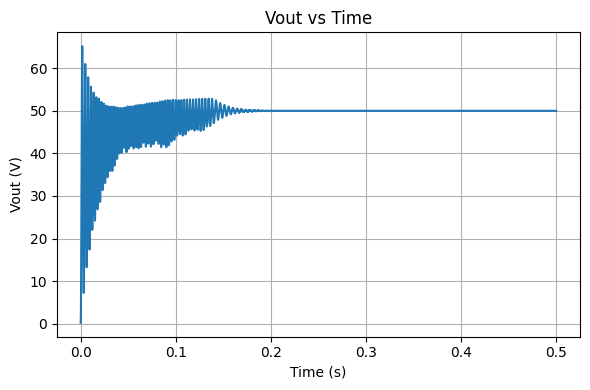

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Extract
t = np.array(out["t"]).squeeze()
Vout = np.array(out["Vout"]).squeeze()

# Plot
plt.figure(figsize=(6,4))
plt.plot(t, Vout)
plt.xlabel("Time (s)")
plt.ylabel("Vout (V)")
plt.title("Vout vs Time")
plt.grid(True)
plt.tight_layout()
plt.show()
